In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [45]:
data = pd.read_csv('/content/drive/My Drive/data/hanoi_quality.csv', index_col='date')

In [46]:
data

,pm25,pm10,o3,no2,so2,co
date,,,,,,
3/1/2019,76,1,15,36,7,7
3/2/2019,117,64,4,28,3,5
3/3/2019,10,64,1,22,16,5
3/4/2019,118,56,13,22,14,6
3/5/2019,2,34,15,21,6,6
...,...,...,...,...,...,...
5/28/2024,85,56,14,1,8,6
5/29/2024,58,50,13,1,8,6
5/30/2024,47,39,10,1,8,8


In [47]:
data.fillna(method='ffill', inplace=True)
scaler = MinMaxScaler()
data['pm25'] = scaler.fit_transform(data[['pm25']])

In [48]:
def create_sequences(data, seq_length=10):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10
X, y = create_sequences(data['pm25'].values, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(seq_length, 1)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [50]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 10)                0         
                                                                 
 dense_9 (Dense)             (None, 128)               1408      
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9729 (38.00 KB)
Trainable params: 9729 (38.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=12)

Epoch 1/50
128/128 [==============================] - 2s 6ms/step - loss: 0.0177 - val_loss: 0.0211
Epoch 2/50
128/128 [==============================] - 1s 4ms/step - loss: 0.0146 - val_loss: 0.0210
Epoch 3/50
128/128 [==============================] - 1s 5ms/step - loss: 0.0147 - val_loss: 0.0242
Epoch 4/50
128/128 [==============================] - 1s 4ms/step - loss: 0.0142 - val_loss: 0.0210
Epoch 5/50
128/128 [==============================] - 0s 3ms/step - loss: 0.0138 - val_loss: 0.0211
Epoch 6/50
128/128 [==============================] - 0s 3ms/step - loss: 0.0141 - val_loss: 0.0211
Epoch 7/50
128/128 [==============================] - 0s 3ms/step - loss: 0.0138 - val_loss: 0.0217
Epoch 8/50
128/128 [==============================] - 0s 2ms/step - loss: 0.0133 - val_loss: 0.0220
Epoch 9/50
128/128 [==============================] - 0s 3ms/step - loss: 0.0133 - val_loss: 0.0223
Epoch 10/50
128/128 [==============================] - 0s 3ms/step - loss: 0.0133 - val_loss: 0.0227

In [52]:
print('Actual value: %s'%str(y[-5:]))
print('Predict value:')
yhat = model.predict(X_test)
print(yhat)

Actual value: [0.38604651 0.26046512 0.20930233 0.21395349 0.44651163]
Predict value:
12/12 [==============================] - 0s 2ms/step
[[ 0.36024514]
 [ 0.42291072]
 [ 0.51418805]
 [ 0.37905642]
 [ 0.4278672 ]
 [ 0.44312578]
 [ 0.3472512 ]
 [ 0.41893873]
 [ 0.35793766]
 [ 0.29051948]
 [ 0.36244345]
 [ 0.2972292 ]
 [ 0.30505395]
 [ 0.37106255]
 [ 0.35162959]
 [ 0.3598858 ]
 [ 0.41156933]
 [ 0.35147646]
 [ 0.28543237]
 [ 0.34574065]
 [ 0.35665607]
 [ 0.33432338]
 [ 0.3338399 ]
 [ 0.48061612]
 [ 0.22443922]
 [ 0.35107428]
 [ 0.49808905]
 [ 0.30868453]
 [ 0.375316  ]
 [ 0.2857019 ]
 [ 0.23704237]
 [ 0.35958323]
 [ 0.3306118 ]
 [ 0.2327629 ]
 [ 0.30892596]
 [ 0.28274912]
 [ 0.26659262]
 [ 0.37112886]
 [ 0.19065045]
 [ 0.19940451]
 [ 0.15821023]
 [ 0.31752524]
 [ 0.24330187]
 [ 0.21352471]
 [ 0.21570992]
 [ 0.24243723]
 [ 0.27973038]
 [ 0.27313316]
 [ 0.27456254]
 [ 0.21477693]
 [ 0.22514448]
 [ 0.21388647]
 [ 0.16723232]
 [ 0.17390084]
 [ 0.17654577]
 [ 0.25948128]
 [ 0.22105518]
 [ 0.1

In [53]:
def RMSE(yhat, y):
    return np.sqrt(np.mean((yhat - y)**2))

yhat = model.predict(X)
RMSE(yhat, y)

60/60 [==============================] - 0s 2ms/step


0.24913374764522814

In [54]:
yhat_inverse = scaler.inverse_transform(np.array(yhat).reshape(-1, 1))

In [55]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y, yhat))
mape = mean_absolute_percentage_error(y, yhat)
mae = mean_absolute_error(y, yhat)

print("RMSE:", rmse)
print("MAPE:", mape)
print("MAE:", mae)

RMSE: 0.1047790369997534
MAPE: 7542868998202.305
MAE: 0.07332609607385984


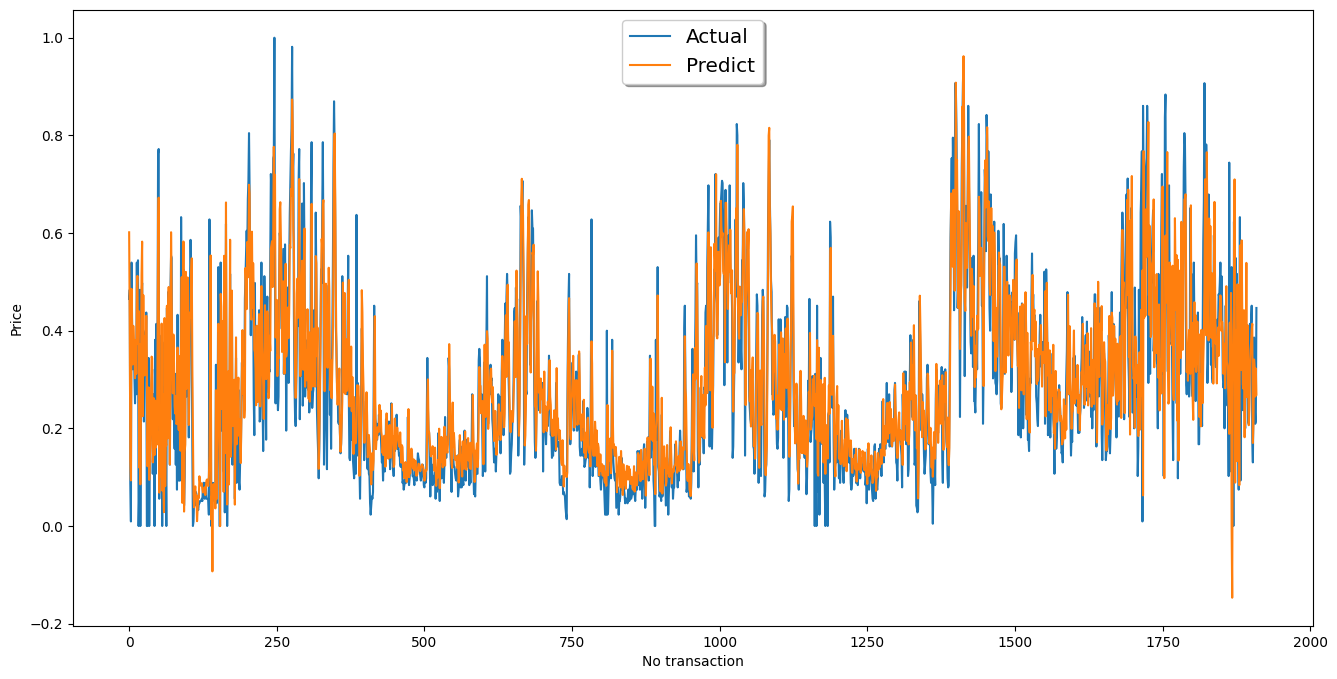

In [56]:
def plt_graph(y, yhat):
    plt.figure(figsize = (16, 8))
    plt.plot(y, label = 'Actual')
    plt.plot(yhat, label = 'Predict')
    plt.xlabel('No transaction')
    plt.ylabel('Price')
    legend = plt.legend(loc = 'upper center', shadow = True, fontsize = 'x-large')


plt_graph(y, yhat)


In [57]:
# Predict the next 90 days PM2.5 values
last_sequence = X_test[-1]
predictions = []
current_sequence = last_sequence

for _ in range(90):
    next_value = model.predict(current_sequence[np.newaxis, :, :])[0, 0]
    predictions.append(next_value)
    current_sequence = np.append(current_sequence[1:], [[next_value]], axis=0)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
print("Next 90 days PM2.5 predictions:", predictions.flatten())

1/1 [==============================] - 0s 20ms/step
Next 90 days PM2.5 predictions: [59.845222 59.415638 76.859634 76.679214 67.86272  56.709045 60.117912
 61.7002   58.182995 59.703503 65.0145   62.342506 59.70601  64.33392
 66.12048  60.097565 59.301674 62.958088 60.907112 58.138336 62.715397
 64.83714  61.079174 61.19472  64.79205  62.12767  58.479477 61.396442
 62.958763 59.662033 60.40688  64.47532  62.935123 60.04826  62.5354
 63.380997 59.63104  59.581345 62.957634 61.775932 59.721855 62.604816
 63.93149  60.739876 60.47354  63.034416 61.46782  59.166573 61.601845
 63.032494 60.598034 60.806644 63.44598  62.114754 59.837254 61.623707
 62.54863  60.11334  60.254894 62.8248   61.979588 60.249474 62.02877
 62.871536 60.510483 60.32575  62.36427  61.482788 59.948044 61.70118
 62.7313   60.843037 60.762028 62.544548 61.61458  60.015995 61.38636
 62.254463 60.62455  60.68664  62.46236  61.794815 60.407623 61.55921
 62.21506  60.611366 60.536106 62.089924 61.570496 60.446014]


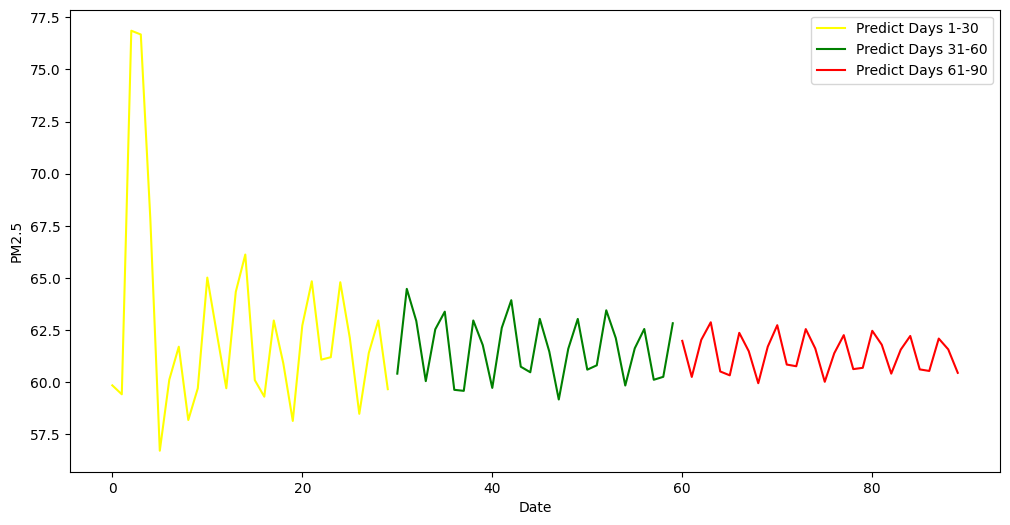

In [58]:
plt.figure(figsize=(12, 6))

dates = np.arange(1, 91)
df = pd.DataFrame({'Date': dates, 'predictions': predictions.flatten()}) # Flatten predictions to 1D array

plt.plot(df['predictions'][:30], color='yellow', label='Predict Days 1-30')
plt.plot(df['predictions'][30:60], color='green', label='Predict Days 31-60')
plt.plot(df['predictions'][60:], color='red', label='Predict Days 61-90')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.legend()

# Show plot
plt.show()